In [1]:
import numpy as np
import pandas as pd
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt 
import string
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv(r"C:\Users\USER PC\OneDrive\Desktop\Projects\Sentimental Analysis on Healthcare Review\healthcare_reviews.csv")

In [3]:
df.loc[df['Rating'] >3, 'Sentiment'] = '1'
df.loc[df['Rating'] ==3, 'Sentiment'] = '0'
df.loc[df['Rating'] <3, 'Sentiment'] = '-1'

In [4]:
df

,Review_Text,Rating,Sentiment
0,I have mixed feelings about my experience.,4,1
1,The staff was caring and attentive. I couldn't...,5,1
2,I have mixed feelings about my experience.,5,1
3,I have mixed feelings about my experience.,5,1
4,The healthcare provider was excellent. I had a...,3,0
...,...,...,...
995,My experience was terrible. I would not recomm...,5,1
996,The service was disappointing. I won't be comi...,4,1
997,"The service was okay, but nothing exceptional.",3,0
998,I have mixed feelings about my experience.,5,1


In [5]:
df.isnull().sum()

Review_Text    100
Rating           0
Sentiment        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Review_Text    0
Rating         0
Sentiment      0
dtype: int64

In [8]:
df.shape

(900, 3)

In [9]:
df['Review_Text'] = df['Review_Text'].str.lower()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\3071069934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Text'] = df['Review_Text'].str.lower()


In [10]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\2174691349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)


In [11]:
english_stopwords = stopwords.words('english')
custom_words_to_retain = ['nor', 'not', "don't"] 


def remove_stop_words(words_list):
    return [t for t in words_list if t not in english_stopwords or t in custom_words_to_retain]

In [12]:
df['stopwords_removed']=df.apply(lambda row:remove_stop_words(row['tokenized_reviews']),axis=1)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\3300637713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopwords_removed']=df.apply(lambda row:remove_stop_words(row['tokenized_reviews']),axis=1)


In [13]:
df

,Review_Text,Rating,Sentiment,tokenized_reviews,stopwords_removed
0,i have mixed feelings about my experience.,4,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
1,the staff was caring and attentive. i couldn't...,5,1,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ..."
2,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
3,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
4,the healthcare provider was excellent. i had a...,3,0,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex..."
...,...,...,...,...,...
995,my experience was terrible. i would not recomm...,5,1,"[my, experience, was, terrible, ., i, would, n...","[experience, terrible, ., would, not, recommen..."
996,the service was disappointing. i won't be comi...,4,1,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b..."
997,"the service was okay, but nothing exceptional.",3,0,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]"
998,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"


In [14]:
punctuations = string.punctuation
def remove_punct(words_list):
    return [t for t in words_list if t not in punctuations]

In [15]:

df['punct_removed']=df.apply(lambda row:remove_punct(row['stopwords_removed']),axis=1)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\1346434174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punct_removed']=df.apply(lambda row:remove_punct(row['stopwords_removed']),axis=1)


In [16]:
lm=WordNetLemmatizer()
def lemmatize_list(words_list):
    return [lm.lemmatize(t) for t in words_list]

# nltk.download('wordnet')

In [17]:
df['lemmatized']=df.apply(lambda row:lemmatize_list(row['punct_removed']),axis=1)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\4050002320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized']=df.apply(lambda row:lemmatize_list(row['punct_removed']),axis=1)


In [18]:
def convert_to_string(words_list):
    return " ".join(words_list)

In [19]:
df['cleaned']=df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_412\1092733341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned']=df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)


In [20]:
df

,Review_Text,Rating,Sentiment,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned
0,i have mixed feelings about my experience.,4,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
1,the staff was caring and attentive. i couldn't...,5,1,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could n't happier
2,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
3,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
4,the healthcare provider was excellent. i had a...,3,0,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience
...,...,...,...,...,...,...,...,...
995,my experience was terrible. i would not recomm...,5,1,"[my, experience, was, terrible, ., i, would, n...","[experience, terrible, ., would, not, recommen...","[experience, terrible, would, not, recommend, ...","[experience, terrible, would, not, recommend, ...",experience terrible would not recommend provider
996,the service was disappointing. i won't be comi...,4,1,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b...","[service, disappointing, wo, n't, coming, back]","[service, disappointing, wo, n't, coming, back]",service disappointing wo n't coming back
997,"the service was okay, but nothing exceptional.",3,0,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional
998,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience


In [21]:
df['Sentiment'].value_counts()

Sentiment
1     388
-1    365
0     147
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
X=df['cleaned'].values
y=df['Sentiment'].values

In [24]:

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
print('X_train='+str(len(X_train)))
print('X_test='+str(len(X_test)))

X_train=675
X_test=225


In [26]:
cv = CountVectorizer(ngram_range=(1,2))

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [27]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [28]:
print((np.count_nonzero(y_train == 1))) 
print((np.count_nonzero(y_train == -1))) 
print((np.count_nonzero(y_train == 0))) 

290
269
116


In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_cv, y_train) 

In [31]:
print((np.count_nonzero(y_train_over == 1))) 
print((np.count_nonzero(y_train_over == -1))) 
print((np.count_nonzero(y_train_over == 0))) 

290
269
290


In [32]:
log_reg_clf=LogisticRegression()
log_reg_clf.fit(X_train_cv, y_train)

LogisticRegression()

In [33]:
y_pred=log_reg_clf.predict(X_test_cv)

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42  0 54]
 [ 8  0 23]
 [45  0 53]]
0.4222222222222222


<Axes: >

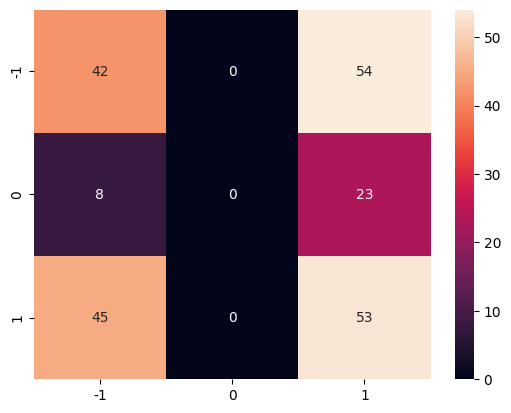

In [35]:
categories = ["-1", "0","1"]
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\USER PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [37]:
sentiment_counts = df['Sentiment'].value_counts()

In [38]:
fig = px.bar(sentiment_counts,height=400,width=700)
fig.update_layout(showlegend=False)
fig.show()

In [39]:

cv = CountVectorizer(ngram_range=(1,2))

X_cv = cv.fit_transform(X)

In [40]:
dataset_analysis = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names_out())
dataset_analysis['Sentiment']=y

In [41]:
dataset_analysis.shape

(900, 71)

In [42]:

temp_df=dataset_analysis.query("Sentiment=='1'")

In [43]:
positive_df=pd.DataFrame()
positive_df['Words']=list(temp_df.iloc[:, :-1].columns)
positive_df['Frequency']=temp_df.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.to_csv(r'positive_df_1.csv',index=False)

In [44]:
positive_df.head()

,Words,Frequency
20,experience,209
58,service,136
48,provider,127
32,healthcare provider,86
31,healthcare,86


In [45]:
positive_df[positive_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,86
67,wo coming,50
16,disappointing wo,50
12,coming back,50
59,service disappointing,50
29,great experience,48
50,provider excellent,48
18,excellent great,48
52,received highly,46
34,highly recommended,46


In [46]:

temp_df=dataset_analysis.query("Sentiment=='-1'")

In [47]:
negative_df=pd.DataFrame()
negative_df['Words']=list(temp_df.iloc[:, :-1].columns)
negative_df['Frequency']=temp_df.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.to_csv(r'negative_df_1.csv',index=False)

In [48]:

negative_df.head()

,Words,Frequency
20,experience,186
58,service,131
48,provider,109
7,bad,80
31,healthcare,73


In [49]:
negative_df[negative_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,73
34,highly recommended,54
61,service received,54
52,received highly,54
57,satisfied service,54
63,staff caring,48
1,attentive could,48
14,could happier,48
10,caring attentive,48
3,average experience,43


In [50]:
temp_df=dataset_analysis.query("Sentiment=='0'")

In [51]:
neutral_df=pd.DataFrame()
neutral_df['Words']=list(temp_df.iloc[:, :-1].columns)
neutral_df['Frequency']=temp_df.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.to_csv(r'neutral_df_1.csv',index=False)

In [52]:
neutral_df.head()

,Words,Frequency
20,experience,186
58,service,131
48,provider,109
7,bad,80
31,healthcare,73


In [53]:
neutral_df[neutral_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,73
34,highly recommended,54
61,service received,54
52,received highly,54
57,satisfied service,54
10,caring attentive,48
14,could happier,48
1,attentive could,48
63,staff caring,48
22,experience neither,43
